# 🧹 SMS Data Cleaning, Tokenization, and Vectorization

In this notebook, we process the **SMS Spam Collection dataset** using the following NLP pipeline:

> **Cleaning → Tokenization → Stopword Removal → Vectorization (BoW & N-grams)**

---

## 🧠 1. Overview

We start with the raw dataset:

$$
\texttt{messages = [label, message]}
$$

Each message is preprocessed to create a **clean corpus** suitable for vectorization.

---

In [38]:
import pandas as pd
import numpy as np

messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label', 'message'])

display(messages.head())

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## ⚙️ 2. Data Cleaning Steps

### Step-by-step process:

1. **Regex Cleaning:**  
   Remove all non-alphabetic characters using:
   $$
   \texttt{re.sub('[\^{}a-zA-Z]', ' ', message)}
   $$

   This removes numbers, punctuation, and special symbols.

2. **Lowercasing:**  
   Convert all characters to lowercase for uniformity:
   $$
   \text{message} = \text{message.lower()}
   $$

3. **Sentence Tokenization:**  
   Split the cleaned text into individual sentences using:
   $$
   S = \text{sent\_tokenize(message)}
   $$
   where $ S = [s_1, s_2, \dots, s_n] $

4. **Word Tokenization:**  
   Tokenize each sentence into words:
   $$
   T_i = \text{word\_tokenize}(s_i)
   $$

5. **Stopword Removal:**  
   Use NLTK’s English stopword list $ W_s $.  
   For each token $ w $, keep it only if:
   $$
   w \notin W_s \quad \text{and} \quad w.\text{isalpha()} = \text{True}
   $$

6. **Flatten and Join:**  
   Flatten all filtered tokens for a message into a single string:
   $$
    \text{filtered\_words} = \text{join}(w_1, w_2, \dots, w_m, \text{separator} = \text{space})
   $$


7. **Corpus Creation:**  
   Store all cleaned messages in a corpus list:
   $$
   \text{corpus} = [d_1, d_2, \dots, d_N]
   $$

---

In [ ]:
"""
Clean and tokenize each SMS message from the 'messages' DataFrame into filtered
lists of words (stopwords removed, only alphabetical tokens kept). The result
for each message is printed as a list of sentences, where each sentence is a
list of filtered tokens.

Inputs / assumptions
-------------------
- A pandas DataFrame named `messages` exists (created in an earlier cell).
    It must contain a column 'message' with text data.
- NLTK resources required:
        - punkt (for sent_tokenize and word_tokenize)
        - stopwords (for english stopwords)
    If these are not downloaded, run:
        import nltk
        nltk.download('punkt')
        nltk.download('stopwords')

Outputs
-------
- Prints `filtered_sentences` for each message. Each printed value is a list of
    sentences; each sentence is a list of tokens (strings) with stopwords removed
    and non-alphabetic tokens discarded.
- A variable `corpus` is initialized (currently unused in this cell) for
    potential accumulation of processed message tokens.

Notes about behavior
--------------------
- The code first removes non-letter characters from the entire message, then
    lowercases it, then performs sentence tokenization. Removing punctuation
    before sentence tokenization can remove sentence boundaries (so sentences
    might not be split as expected). For more robust sentence splitting, consider
    sentence-tokenizing the original message first, then cleaning tokens.
- The stopword set is created inside the loop (inefficient). Move creation
    outside the loop for performance.
- `filtered_sentences` is structured as a list-of-lists-of-lists:
        [
            [ [word1, word2, ...],        # sentence 1 tokens for message i
                [word1, word2, ...],        # sentence 2 tokens for message i
                ...
            ],
            ...
        ]
    In this cell, we only print the per-message sentence-token lists.

Possible improvements
---------------------
- Pre-compile regex and create stop_words once outside the loop.
- Consider lemmatization/stemming for normalization.
- Accumulate processed tokens into `corpus` or another structure as needed.
- Handle missing/NaN messages safely (skip or fill).

"""

import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize



corpus = []  # placeholder for collecting processed messages (unused here)

# Loop through all messages in the DataFrame
for i in range(0, len(messages)):
        # 1) Remove any non-alphabetic characters and replace with space.
        #    This removes punctuation, digits, and special characters.
        #    NOTE: Doing this before sentence splitting can remove sentence
        #    boundaries (e.g., periods). Consider tokenizing sentences first.
        review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])

        # 2) Convert the text to lowercase for case-insensitive processing.
        review = review.lower()

        # 3) Sentence tokenization: split the review into sentences.
        #    If punctuation was removed above, sent_tokenize may not split as intended.
        sentences = sent_tokenize(review)

        # 4) Word tokenization: convert each sentence into a list of tokens (words).
        tokenized_sentences = [word_tokenize(s) for s in sentences]

        # 5) Stopword removal:
        #    Create a set of English stopwords. Converting to set makes membership
        #    checks O(1). For efficiency, move this line outside the loop.
        stop_words = set(stopwords.words('english'))

        # 6) Filter tokens:
        #    - This list comprehension flattens `tokenized_sentences` (a list of
        #      sentence-level token lists) into a single sequence of tokens for
        #      the current message. We perform three things for each token `w`:
        #        1. Lowercase it for case-insensitive processing (w.lower()).
        #        2. Exclude it if it appears in the `stop_words` set (stopword removal).
        #        3. Keep it only if it is purely alphabetic (w.isalpha()) which
        #           discards numbers, punctuation, and tokens containing symbols.
        #    - Important behavioral notes:
        #        * Sentence boundaries are lost because we flatten all sentence
        #          token lists into one list. If you need per-sentence tokens,
        #          build a list-of-lists instead of flattening.
        #        * Lowercasing before the stopword check ensures membership is
        #          case-insensitive. Make sure `stop_words` contains lowercased items.
        #        * Using `isalpha()` removes contractions (e.g., "don't" -> removed
        #          or split earlier depending on tokenization) and tokens with
        #          hyphens or apostrophes; choose a different filter if you want
        #          to preserve those.
        #        * For performance, `stop_words` should be created once outside the
        #          loop (see earlier note) rather than re-created per message.
        filtered_words = [
            w.lower()
            for tokens in tokenized_sentences
            for w in tokens
            if w.lower() not in stop_words and w.isalpha()
        ]

        # 7) Convert the filtered token list for this message into a single string
        # (space-separated). If you prefer to keep tokens as lists, omit this join.
        filtered_words = ' '.join(filtered_words)

        # 8) Append the cleaned, joined string for this message to `corpus`.
        corpus.append(filtered_words)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think goes usf lives around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aids patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hours', 'mobile months u r entitled update latest colour mobiles camera free call mobile update co free', 'gon na home soon want talk stuff anymore tonight k cried enough today', 'six chances win cash pounds txt csh send cost p day days tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw


---

## 🧮 3. Bag of Words (Count Vectorization)

We use **Scikit-Learn’s CountVectorizer** to convert text into numerical features.

$$
X = \text{CountVectorizer.fit\_transform(corpus)}
$$

Each message is represented as a **vector of word counts**, where  
$ X_{ij} $ = 1 if word $ j $ appears in message $ i $, otherwise 0 (binary=True).

$$
X \in \mathbb{R}^{N \times M}
$$
where:
- $ N $ = number of messages  
- $ M $ = number of unique words (max\_features=2500)

Example parameters:
```python
CountVectorizer(lowercase=True, max_features=2500, binary=True)
```

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(lowercase=True, max_features=2500, binary=True)

X = count_vectorizer.fit_transform(corpus).toarray()



In [44]:
count_vectorizer.vocabulary_

{'go': np.int64(851),
 'point': np.int64(1603),
 'crazy': np.int64(464),
 'available': np.int64(141),
 'bugis': np.int64(274),
 'great': np.int64(873),
 'world': np.int64(2439),
 'la': np.int64(1122),
 'cine': np.int64(380),
 'got': np.int64(866),
 'wat': np.int64(2358),
 'ok': np.int64(1481),
 'lar': np.int64(1132),
 'joking': np.int64(1082),
 'wif': np.int64(2398),
 'oni': np.int64(1490),
 'free': np.int64(779),
 'entry': np.int64(641),
 'wkly': np.int64(2421),
 'comp': np.int64(419),
 'win': np.int64(2402),
 'cup': np.int64(479),
 'final': np.int64(733),
 'tkts': np.int64(2190),
 'st': np.int64(2007),
 'may': np.int64(1290),
 'text': np.int64(2139),
 'receive': np.int64(1719),
 'question': np.int64(1674),
 'std': np.int64(2023),
 'txt': np.int64(2251),
 'rate': np.int64(1696),
 'apply': np.int64(99),
 'dun': np.int64(600),
 'say': np.int64(1821),
 'early': np.int64(604),
 'already': np.int64(65),
 'nah': np.int64(1409),
 'think': np.int64(2158),
 'goes': np.int64(853),
 'usf': np.in

## 🧩 4. N-Gram Feature Extraction

After tokenization and stopword removal, we extract **n-gram features**  
to capture short-range dependencies between consecutive words.

---

### 🔹 What are N-Grams?

An **n-gram** is a contiguous sequence of *n* words in a document.

$$
g_i = [w_{i}, w_{i+1}, \dots, w_{i+n-1}]
$$

where  
- $ w_i $ = word token  
- $ n $ = number of words in each sequence  

For example, given the text:

> “The quick brown fox jumps”

We can extract:
- **Unigrams (n=1):** `The`, `quick`, `brown`, `fox`, `jumps`
- **Bigrams (n=2):** `The quick`, `quick brown`, `brown fox`, `fox jumps`
- **Trigrams (n=3):** `The quick brown`, `quick brown fox`, `brown fox jumps`

---

### ⚙️ N-Gram Range Used

We configure the vectorizer to extract **bigrams and trigrams**:

$$
\text{ngram\_range} = (2, 3)
$$

This means:
- Include sequences of 2 and 3 consecutive words.
- Captures contextual meaning beyond individual words.

---

### 💡 Example Formula

Each feature $ g_j $ represents an n-gram pattern.  
For a document $ d_i $:

$$
X_{ij} =
\begin{cases}
1, & \text{if } g_j \text{ appears in } d_i \\[4pt]
0, & \text{otherwise}
\end{cases}
$$

The resulting **Bag-of-N-Grams** matrix \( X \in \{0,1\}^{N \times M} \)  
captures word presence across all messages.

---

### ⚙️ CountVectorizer Configuration

We use **Scikit-Learn’s CountVectorizer**:

```python
count_vectorizer = CountVectorizer(
    lowercase=True,
    max_features=2500,
    binary=True,
    ngram_range=(2,3)
)

X = count_vectorizer.fit_transform(corpus).toarray()
```

In [53]:
count_vectorizer = CountVectorizer(lowercase=True, max_features=2500, binary=True, ngram_range=(2,3))

X = count_vectorizer.fit_transform(corpus).toarray()

In [54]:
count_vectorizer.vocabulary_

{'ok lar': np.int64(1453),
 'free entry': np.int64(674),
 'entry wkly': np.int64(621),
 'wkly comp': np.int64(2441),
 'cup final': np.int64(475),
 'std txt': np.int64(1883),
 'txt rate': np.int64(2124),
 'rate apply': np.int64(1668),
 'free entry wkly': np.int64(676),
 'std txt rate': np.int64(1884),
 'txt rate apply': np.int64(2125),
 'like fun': np.int64(1094),
 'per request': np.int64(1537),
 'oru minnaminunginte': np.int64(1499),
 'vettam set': np.int64(2277),
 'set callertune': np.int64(1792),
 'callertune callers': np.int64(214),
 'callers press': np.int64(212),
 'press copy': np.int64(1612),
 'copy friends': np.int64(447),
 'friends callertune': np.int64(699),
 'oru minnaminunginte nurungu': np.int64(1500),
 'vettam set callertune': np.int64(2278),
 'set callertune callers': np.int64(1793),
 'callertune callers press': np.int64(215),
 'callers press copy': np.int64(213),
 'press copy friends': np.int64(1613),
 'copy friends callertune': np.int64(448),
 'valued network': np.int64

In [55]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 2500))

# 🔗 N-Gram Vectorization Pipeline (LaTeX Flow Diagram)

Below is a step-by-step representation of how your messages flow through  
the preprocessing and feature extraction pipeline:

---

$$
\begin{array}{c}
\boxed{\textbf{Raw SMS Messages}} \\[6pt]
\Downarrow\ \text{Cleaning (Regex, Lowercasing)} \\[6pt]
\boxed{\textbf{Cleaned Text}} \\[6pt]
\Downarrow\ \text{Sentence Tokenization } (\texttt{sent\_tokenize}) \\[6pt]
\boxed{\textbf{Sentences } S_i} \\[6pt]
\Downarrow\ \text{Word Tokenization } (\texttt{word\_tokenize}) \\[6pt]
\boxed{\textbf{Tokens } T_i = [w_1, w_2, \dots, w_n]} \\[6pt]
\Downarrow\ \text{Stopword Removal + isalpha()} \\[6pt]
\boxed{\textbf{Filtered Tokens } T_i' = [w_1', w_2', \dots, w_m']} \\[6pt]
\Downarrow\ \text{N-Gram Generation } (\texttt{ngram\_range} = (2,3)) \\[6pt]
\boxed{\textbf{N-Grams } g_j = [w_k, w_{k+1}, \dots, w_{k+n-1}]} \\[6pt]
\Downarrow\ \text{CountVectorizer Fit-Transform} \\[6pt]
\boxed{\textbf{Sparse Matrix } X \in \{0,1\}^{N \times M}} \\[6pt]
\Downarrow\ \text{Model Input (Classifier / ML)} \\[6pt]
\boxed{\textbf{Spam / Ham Prediction}}
\end{array}
$$

---

### 💡 Mathematical Summary

Each document $ d_i $ (cleaned SMS message) is transformed into a binary vector $ X_i $:

$
X_i = [x_{i1}, x_{i2}, \dots, x_{iM}]
$
where:

$$
x_{ij} =
\begin{cases}
1, & \text{if n-gram } g_j \text{ appears in } d_i \\[4pt]
0, & \text{otherwise}
\end{cases}
$$

and

$$
X = 
\begin{bmatrix}
X_1 \\[4pt]
X_2 \\[4pt]
\vdots \\[4pt]
X_N
\end{bmatrix}
\in \{0,1\}^{N \times M}
$$

---

### 🧠 Key Takeaways

- Each message becomes a vector of binary n-gram features.  
- The matrix $ X $ is typically **sparse** — most entries are zero.  
- This representation feeds directly into models like **Naive Bayes**, **Logistic Regression**, or **SVM** for spam detection.

> 🧩 *Text → Cleaned Tokens → N-Grams → Sparse Matrix → Machine Learning Input*


## 🧩 1️⃣ Goal

We have already transformed the SMS text corpus into a Bag-of-Words / N-gram matrix $ X \in \{0,1\}^{N\times M} $.  
The next goal is to build and evaluate a binary classifier that predicts **spam** vs **ham**.

**High-level steps:**

1. Encode labels (spam / ham) into numeric targets $ y \in \{0,1\}^N $.  
2. Split dataset into training and test sets.  
3. Train a classifier (Multinomial Naive Bayes as baseline).  
4. Evaluate using accuracy, confusion matrix, and classification report.  
5. Try alternate classifiers (e.g., Logistic Regression) if needed.  
6. Example inference: predict a new SMS message (spam/ham).

---

### 🧠 Mathematical view

Let $ X $ be the BoW / n-gram binary matrix and $ y $ be labels:

$$
X \in \{0,1\}^{N\times M},\qquad y \in \{0,1\}^N
$$

Train a classifier  $ f $ such that:

$$
\hat{y} = f(X_{\text{new}})
$$

We will use Multinomial Naive Bayes as a strong baseline for text classification.


In [56]:
# 1) Label encoding: convert "ham"/"spam" to numeric values (0/1)
#    - Input: messages DataFrame (must have 'label' column)
#    - Output: y (numpy array of 0/1)
from sklearn.preprocessing import LabelEncoder

# 1) Initialize label encoder
labelencoder = LabelEncoder()

# 2) Fit and transform the 'label' column
#    - 'ham' -> 0, 'spam' -> 1 (confirm mapping after transformation)
y = labelencoder.fit_transform(messages['label'])

# 3) Print mapping for clarity
mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print("# 1) Label mapping:", mapping)
# 4) Optional quick sanity check
print("# 2) Example labels (first 10):", y[:10])


# 1) Label mapping: {'ham': np.int64(0), 'spam': np.int64(1)}
# 2) Example labels (first 10): [0 0 1 0 0 1 0 0 1 1]


In [57]:
# 2) Train-test split
#    - Uses X (feature matrix) and y (labels)
#    - Standard split: 80% train, 20% test (random_state for reproducibility)
from sklearn.model_selection import train_test_split

# 1) Perform split
X_train, X_test, y_train, y_test = train_test_split(
    X,                # feature matrix from CountVectorizer
    y,                # numeric labels
    test_size=0.2,    # 20% for testing
    random_state=42,  # deterministic split for reproducibility
    stratify=y        # preserve label distribution
)

# 2) Print shapes for verification
print(f"# 1) X_train shape: {X_train.shape}")
print(f"# 2) X_test  shape: {X_test.shape}")
print(f"# 3) y_train length: {len(y_train)}")
print(f"# 4) y_test  length: {len(y_test)}")


# 1) X_train shape: (4457, 2500)
# 2) X_test  shape: (1115, 2500)
# 3) y_train length: 4457
# 4) y_test  length: 1115


In [65]:
# 3) Train Multinomial Naive Bayes (text baseline)
#    - MultinomialNB works well for count-based text features.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Initialize model
nb_clf = MultinomialNB()

# 2) Fit model on training data
#    - X_train : shape (n_train, n_features)
#    - y_train : (n_train,)
nb_clf.fit(X_train, y_train)

# 3) Predict on test set
y_pred = nb_clf.predict(X_test)

# 4) Evaluate: Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"# 1) Test Accuracy: {acc:.4f}")

# 5) Confusion matrix (TN, FP, FN, TP)
cm = confusion_matrix(y_test, y_pred)
print("# 2) Confusion Matrix (rows=true, cols=pred):")
print(cm)

# 6) Full classification report (precision, recall, f1)
print("# 3) Classification Report:")
print(classification_report(y_test, y_pred, target_names=labelencoder.classes_))

# 4️⃣ Evaluate model performance
print(f"✅ Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 1) Test Accuracy: 0.9614
# 2) Confusion Matrix (rows=true, cols=pred):
[[964   2]
 [ 41 108]]
# 3) Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.98      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

✅ Model Accuracy: 0.9614

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.98      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:

# 4 Show some test samples with predicted labels
for i in range(10):
    print(f"Message: {messages['message'].iloc[i][:80]}...")
    pred_label = 'SPAM 🚨' if nb_clf.predict([X[i]])[0] == 1 else 'HAM ✅'
    print("Predicted:", pred_label)
    print("Actual:", messages['label'].iloc[i])
    print("-" * 80)

Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet...
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: Ok lar... Joking wif u oni......
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 8...
Predicted: SPAM 🚨
Actual: spam
--------------------------------------------------------------------------------
Message: U dun say so early hor... U c already then say......
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: Nah I don't think he goes to usf, he lives around here though...
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like

## 📊 Evaluate model — Confusion Matrix & Sample Predictions

**What this cell does**

1. (Re)trains a Multinomial Naive Bayes classifier on the precomputed BoW / ngram matrix `X` and labels `y` (if not already trained).  
2. Splits data into train / test sets (80/20) with stratification to preserve class balance.  
3. Predicts on the test set and prints:
   - Accuracy
   - Classification report (precision, recall, f1)
4. Plots a labeled **confusion matrix** (counts and optionally normalized).  
5. Shows **N random test messages** with:
   - raw message text
   - true label (ham/spam)
   - predicted label
   - predicted probability for the positive class (spam)
6. Stores predictions in a DataFrame (`df_results`) for further inspection / export.

**Mathematical reminder**

Confusion matrix:

$$
\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}
$$

Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Precision (spam):
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Recall (spam):
$$
\text{Recall} = \frac{TP}{TP + FN}
$$


✅ Test Accuracy: 0.9614

🔍 Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.98      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



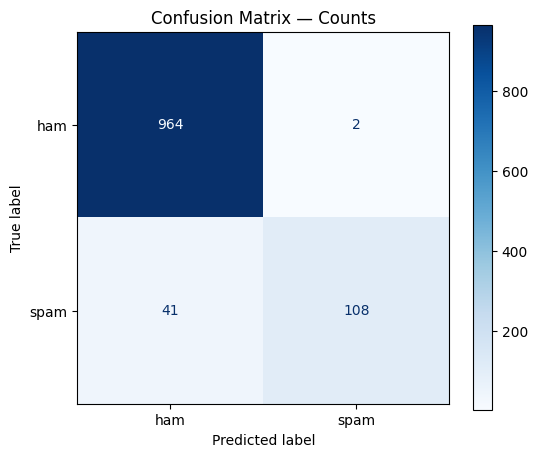

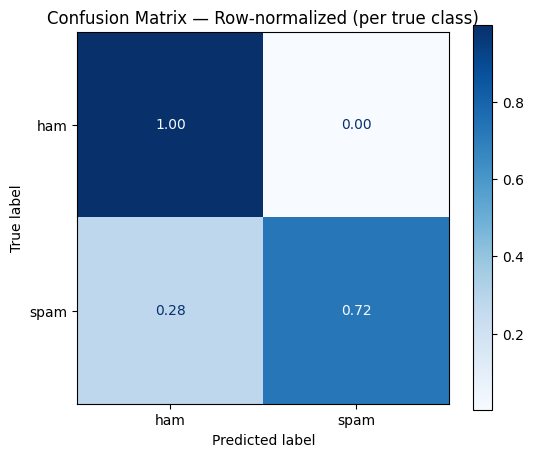


🔎 Random sample of test-set predictions:

# 1) Index: 5098
    Message (truncated): TheMob>Hit the link to get a premium Pink Panther game, the new no. 1 from Sugababes, a crazy Zebra animation or a badass Hoody wallpaper-all 4 FREE!
    True Label : spam
    Pred Label : ham
    Pred P(spam) : 0.134
--------------------------------------------------------------------------------

# 2) Index: 3347
    Message (truncated): U're welcome... Caught u using broken english again...
    True Label : ham
    Pred Label : ham
    Pred P(spam) : 0.134
--------------------------------------------------------------------------------

# 3) Index: 4276
    Message (truncated): Haiyoh... Maybe your hamster was jealous of million
    True Label : ham
    Pred Label : ham
    Pred P(spam) : 0.134
--------------------------------------------------------------------------------

# 4) Index: 2564
    Message (truncated): K..k..i'm also fine:)when will you complete the course?
    True Label : ham
    Pre

,idx,message,true_label,pred_label,pred_prob_spam
0,2825,No need to buy lunch for me.. I eat maggi mee..,ham,ham,0.040837
1,3695,Ok im not sure what time i finish tomorrow but...,ham,ham,0.000715
2,3904,Waiting in e car 4 my mum lor. U leh? Reach ho...,ham,ham,0.040837
3,576,"You have won ?1,000 cash or a ?2,000 prize! To...",spam,spam,0.999656
4,2899,If you r @ home then come down within 5 min,ham,ham,0.134171
5,3456,No need lar. Jus testing e phone card. Dunno n...,ham,ham,0.003204
6,5128,Wot about on wed nite I am 3 then but only til 9!,ham,ham,0.134171
7,919,Hey you gave them your photo when you register...,ham,ham,0.036904
8,2505,"Hello, my boytoy! I made it home and my consta...",ham,ham,0.000344
9,17,Eh u remember how 2 spell his name... Yes i di...,ham,ham,0.134171


In [ ]:
# EVALUATION CELL: Confusion matrix + random sample predictions
# Assumptions:
#  - `X` is the feature matrix (from CountVectorizer)
#  - `messages` is the DataFrame with 'label' and 'message'
#  - `labelencoder` exists and maps {'ham':0,'spam':1}
# If any variables are missing, run the earlier cells that prepare them.

# 1) Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import random

# 2) Prepare train/test split (reproducible)
#    - We stratify on y to keep class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Train Multinomial Naive Bayes (baseline)
nb_model = MultinomialNB()           # 3.1) initialize
nb_model.fit(X_train, y_train)       # 3.2) train on training data

# 4) Predict on test set
y_pred = nb_model.predict(X_test)            # 4.1) predicted class (0/1)
y_proba = nb_model.predict_proba(X_test)     # 4.2) predicted class probabilities (shape: n_samples x n_classes)
proba_spam = y_proba[:, 1]                   # 4.3) probability of class 'spam' (1)

# 5) Print evaluation metrics
acc = accuracy_score(y_test, y_pred)         # 5.1) accuracy
print(f"✅ Test Accuracy: {acc:.4f}\n")

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=labelencoder.classes_))

# 6) Confusion matrix (counts)
cm = confusion_matrix(y_test, y_pred)        # 6.1) [[TN, FP], [FN, TP]]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelencoder.classes_)

# 7) Plot confusion matrix (counts)
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title("Confusion Matrix — Counts")
plt.show()

# 8) Optional: normalized confusion matrix (fractions)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labelencoder.classes_)
disp_norm.plot(ax=ax, cmap='Blues', values_format='.2f')
ax.set_title("Confusion Matrix — Row-normalized (per true class)")
plt.show()

# 9) Build results DataFrame for test set for inspection or export
#    - We need to recover the original message texts corresponding to X_test rows.
#    - If we used train_test_split on X and y only, we must also split the messages DataFrame indices.
#    - To get the corresponding indices, repeat train_test_split with return of indices.

# Re-split to get indices aligned with messages (deterministic, same random_state)
indices = np.arange(len(messages))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=y)

# Prepare DataFrame of results for the test portion
df_results = pd.DataFrame({
    'idx': test_idx,
    'message': messages['message'].iloc[test_idx].values,
    'true_label_num': y_test,
    'pred_label_num': y_pred,
    'pred_prob_spam': proba_spam
})

# Decode numeric labels back to 'ham'/'spam'
df_results['true_label'] = labelencoder.inverse_transform(df_results['true_label_num'])
df_results['pred_label'] = labelencoder.inverse_transform(df_results['pred_label_num'])

# Reorder columns for readability
df_results = df_results[['idx', 'message', 'true_label', 'pred_label', 'pred_prob_spam']]

# 10) Show random N sample predictions from the test set (N = 10)
N = 10
random.seed(42)
sample_rows = df_results.sample(n=min(N, len(df_results)), random_state=42).reset_index(drop=True)

print("\n🔎 Random sample of test-set predictions:")
for i, row in sample_rows.iterrows():
    print(f"\n# {i+1}) Index: {row['idx']}")
    print(f"    Message (truncated): {row['message'][:200]}{'...' if len(row['message'])>200 else ''}")
    print(f"    True Label : {row['true_label']}")
    print(f"    Pred Label : {row['pred_label']}")
    print(f"    Pred P(spam) : {row['pred_prob_spam']:.3f}")
    print("-"*80)

# 11) Optional: display the full df_results DataFrame head for inspection
print("\n🗂️ Head of df_results (first 10 rows):")
display(df_results.head(10))

# 🧮 Why TF-IDF? — Limitations of Bag of Words (BoW) and the Need for Weighting

---

## 📦 1️⃣ Recap: Bag of Words (BoW)

The **Bag of Words** model represents each document as a vector of word frequencies or binary occurrences.

$$
X_{ij} =
\begin{cases}
1, & \text{if word } j \text{ appears in document } i \\
0, & \text{otherwise}
\end{cases}
$$
or
$$
X_{ij} = f_{ij}
$$
where $ f_{ij} $ = frequency of word $ j $ in document $ i $.

---

## ⚠️ 2️⃣ Drawbacks of BoW

While BoW is simple and effective for small datasets, it has several key limitations:

### 1️⃣ **Ignores Word Importance**
- Words that appear frequently across *all* documents (e.g., “the”, “is”, “and”) dominate feature vectors.
- These common words don’t help distinguish one message from another, yet they contribute heavily to similarity metrics.

### 2️⃣ **Equal Weight to All Words**
- BoW treats all terms equally — “lottery” and “the” have the same weight if they appear once.
- This is unrealistic because not all words carry equal semantic or discriminative power.

### 3️⃣ **No Context or Order**
- The model ignores word sequence.
- For example: “I love spam” and “spam love I” produce identical vectors.

### 4️⃣ **High Dimensionality and Sparsity**
- Each unique token creates a new dimension.
- Most entries in $ X $ are zero (sparse matrix), leading to high memory usage.

### 5️⃣ **Poor Generalization**
- Unseen words during training are ignored completely.
- Vocabulary mismatch causes feature misalignment between train and test sets.

---

## 💡 3️⃣ Motivation for TF-IDF

We need a weighting scheme that:
- **Down-weights** common, less informative words.  
- **Up-weights** rare but meaningful words (e.g., “lottery”, “winner”, “claim”).  
- Preserves simplicity but improves discriminative power.

That’s where **Term Frequency–Inverse Document Frequency (TF-IDF)** comes in.

---

## 🧮 4️⃣ TF-IDF Formula

TF-IDF combines **Term Frequency (TF)** and **Inverse Document Frequency (IDF)**.

### 🔹 Term Frequency (TF)
Measures how often a word appears in a single document.

$$
TF_{ij} = \frac{\text{Number of repeated words in sentence } i}{\text{Total number of words in sentence } i}
$$

or simply:

$$
TF_{ij} = \frac{f_{ij}}{N_i}
$$

where:
- $ f_{ij} $ = number of times word $ j $ appears in sentence $ i $
- $ N_i $ = total number of words in sentence $ i $

or where:
- $ f_{ij} $ = count of word $ j $ in document $ i $
- denominator = total number of words in document $ i $

### 🔹 Inverse Document Frequency (IDF)
Measures how unique a word is across all documents.

$$
IDF_j = \log_e\!\left(\frac{\text{Total number of sentences}}{\text{Number of sentences containing the word } j}\right)
$$

or equivalently:

$$
IDF_j = \log_e\!\left(\frac{S}{S_j}\right)
$$

where:
- $ S $ = total number of sentences (or documents)
- $ S_j $ = number of sentences containing the word $ j $

or where:
- $ N $ = total number of documents  
- $ n_j $ = number of documents containing word $ j $

### 🔹 Combined TF-IDF Weight
$$
TFIDF_{ij} = TF_{ij} \times IDF_j
$$

---

## 🧠 5️⃣ Intuition

| Word | Frequency (Spam Msgs) | Frequency (All Msgs) | Weight |
|------|------------------------|----------------------|--------|
| the | Very high | Very high | Low (uninformative) |
| claim | High | Low | High (informative) |
| free | Moderate | Low | Medium-High |
| winner | Low | Rare | High |

TF-IDF ensures words like “free”, “claim”, and “winner” get higher weights in spam messages, while neutral words like “the” and “in” get near zero weight.

---


## 💡 3️⃣ Example Calculation

Let’s consider 3 sentences:

| Sentence ID | Sentence |
|--------------|-----------|
| 1 | The cat sat on the mat |
| 2 | The dog sat on the log |
| 3 | The cat chased the dog |

### Step 1️⃣ — Term Frequency (TF)

Let’s calculate for the word **“cat”** in Sentence 1:

- Number of times “cat” appears in Sentence 1 = 1  
- Total number of words in Sentence 1 = 6  

$$
TF_{\text{cat},1} = \frac{1}{6} = 0.1667
$$

---

### Step 2️⃣ — Inverse Document Frequency (IDF)

- Total number of sentences $ S = 3 $ 
- Number of sentences containing “cat” $ S_{\text{cat}} = 2 $ (Sentence 1 and Sentence 3)

$$
IDF_{\text{cat}} = \log_e\!\left(\frac{3}{2}\right) = 0.405
$$

---

### Step 3️⃣ — TF-IDF Weight

$$
TFIDF_{\text{cat},1} = 0.1667 \times 0.405 = 0.0675
$$

---

### 🧠 Interpretation

| Word | Sentence | TF | IDF | TF-IDF | Meaning |
|------|-----------|----|-----|---------|----------|
| cat | Sentence 1 | 0.1667 | 0.405 | 0.0675 | Appears once, moderately common |
| dog | Sentence 2 | 0.1667 | 0.405 | 0.0675 | Appears in 2/3 sentences |
| chased | Sentence 3 | 0.1667 | 1.098 | 0.183 | Rare → more important |

---

### ✅ 4️⃣ Summary

$$
\boxed{
TFIDF_{ij} = 
\left(\frac{\text{Repeated words in sentence } i}{\text{Total words in sentence } i}\right)
\times
\log_e\!\left(\frac{\text{Total sentences}}{\text{Sentences containing the word}}\right)
}
$$

TF-IDF increases with **local frequency** (within a sentence)  
and decreases with **global frequency** (across all sentences).  
Thus, it rewards words that are **frequent locally but rare globally** —  
perfect for distinguishing **spam** vs **ham** keywords.

## ✅ 6️⃣ Advantages of TF-IDF over BoW

| Aspect | BoW | TF-IDF |
|--------|------|---------|
| Word weighting | Binary / raw count | Weighted by informativeness |
| Common words | High influence | Down-weighted |
| Rare, meaningful words | Treated equally | Up-weighted |
| Dimensionality | Same | Same |
| Discrimination power | Low | High |

---

## 🧩 7️⃣ Summary

$$
\boxed{
TFIDF_{ij} = \frac{f_{ij}}{\sum_k f_{ik}} \cdot \log \frac{N}{n_j}
}
$$

or equivalently:

$$
\boxed{
TFIDF_{ij} = 
\left(\frac{\text{Repeated words in sentence } i}{\text{Total words in sentence } i}\right)
\times
\log_e\!\left(\frac{\text{Total sentences}}{\text{Sentences containing the word}}\right)
}
$$
---

TF-IDF improves BoW by incorporating **global word significance**.  
It remains interpretable, fast to compute, and forms a strong foundation for most text classification models — including **spam vs ham** detection.

>  *“BoW counts words; TF-IDF values them.”* 
